**Has the network latency gone up since we switched internet service providers?**

Null Hypothesis - The network latency has not gone up since we switched internet service providers.
Alternative Hypothesis - The network latency has gone up since we switched internet service providers.
True Positive - The internet service provider does affect the network latency, and we were correct.
True Negative - The internet service provider does  NOT affect the network latency, and we were correct.
Type 1 Error - The internet service provider does affect the network latency, and we were WRONG.
Type 2 Error - The internet service provider does NOT affect the network latency, and we were WRONG.

**Does the instagram redesign increase screen hours per user on the app?**

Null Hypothesis - The instagram redesign had no effect on user screen hours per day.
Alternative Hypothesis - The instagram redesign did effect user screen hours per day.
True Positive - The new design allows users to easily access reels which is found to increase screen hours per day.
True Negative - The redesigned home page resulted in a similar month to month user screen hours per day.
Type 1 Error - The algorithm was boosting reels content that month which caused higher screen hours, not the redesign.
Type 2 Error - After the redesign more users spent their screen hours on reels instead of the main feed each day.

**Does more advertisments of the new Chevy Silverado drive up sales?**

Null Hypothesis - Sales of the new Chevy Silverado were not affected with increased advertisements.
Alternative Hypothesis - Sales of the new Chevy Silverado were affected with increased advertisements.
True Positive - The more money spent on advertisements the more the sales across the country for that year.
True Negative - More money spent on advertisements did not show a change in sales for that year.
Type 1 Error - Sales only increased during the year for the big savings month in december, not because of the advertisements.
Type 2 Error - More advertisements drove up sales in southern states rather than the whole country.

In [1]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats

**Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.**

In [4]:
alpha = 0.05
data = {
    "Uses_a_Macbook": [49, 20],
    "Doesnt_Use_A_Macbook": [1, 30]
}

index_names = ["Codeup_Student", "Not_Codeup_Student"]

observed = pd.DataFrame(data, index=index_names)
observed

,Uses_a_Macbook,Doesnt_Use_A_Macbook
Codeup_Student,49,1
Not_Codeup_Student,20,30


In [5]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [6]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49  1]
 [20 30]]

Expected
[[34 15]
 [34 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [7]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We can conclude there is a relationship between being a codeup studet and owning a macbook.

**Choose another 2 categorical variables from the mpg dataset.**


In [22]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* State your null and alternative hypotheses.

- $H_o$: There is no relationship between manufacturer and engine cylinders
- $H_a$: There is a relationship between manufacturer and engine cylinders

* State your alpha.

In [12]:
alpha = 0.05

* Perform a chi2 test of independence.

In [23]:
observed_mpg = pd.crosstab(df.manufacturer, df.cyl)
chi2, p, dof, expected = stats.chi2_contingency(observed_mpg)

In [24]:
print('Observed')
print(observed_mpg.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 8  0  9  1]
 [ 2  0  3 14]
 [ 1  0 15 21]
 [ 0  0 10 15]
 [ 9  0  0  0]
 [ 8  0  6  0]
 [ 0  0  3  5]
 [ 0  0  0  4]
 [ 0  0  0  3]
 [ 0  0  2  2]
 [ 4  0  8  1]
 [ 0  0  4  1]
 [14  0  0  0]
 [18  0 13  3]
 [17  4  6  0]]

Expected
[[ 6  0  6  5]
 [ 6  0  6  5]
 [12  0 12 11]
 [ 8  0  8  7]
 [ 3  0  3  2]
 [ 4  0  4  4]
 [ 2  0  2  2]
 [ 1  0  1  1]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 4  0  4  3]
 [ 1  0  1  1]
 [ 4  0  4  4]
 [11  0 11 10]
 [ 9  0  9  8]]

----
chi^2 = 198.1175
p     = 0.0000


* State your conclusion.

In [25]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    ('Fail to reject the null hypothesis')

Reject the null hypothesis


**Use the data from the employees database to answer these questions:**

In [2]:
import env
employees = pd.read_sql('select * from employees limit 5', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- $H_o$: There is no relationship between gender and working in sales or marketing
- $H_a$: There is a relationship between gender and working in sales or marketing

In [46]:
gender_and_department = pd.read_sql('''select de.to_date, d.dept_name, e.gender
from dept_emp as de
join employees as e
	using (emp_no)
join departments as d
	on d.dept_no = de.dept_no
where de.to_date = '9999-01-01' and d.dept_name = 'Sales' 
or de.to_date = '9999-01-01' and d.dept_name = 'Marketing'
    ;''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
gender_and_department

,to_date,dept_name,gender
0,9999-01-01,Marketing,F
1,9999-01-01,Marketing,M
2,9999-01-01,Marketing,F
3,9999-01-01,Marketing,F
4,9999-01-01,Marketing,F
...,...,...,...
52538,9999-01-01,Sales,F
52539,9999-01-01,Sales,M
52540,9999-01-01,Sales,M
52541,9999-01-01,Sales,F


In [47]:
observed_employees_dept = pd.crosstab(gender_and_department.dept_name, gender_and_department.gender)
observed_employees_dept

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [51]:
alpha = 0.05

chi2, p, dof, expected = stats.chi2_contingency(observed_employees_dept)

print('Observed')
print(observed_employees_dept.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864  8978]
 [14999 22702]]

Expected
[[ 5893  8948]
 [14969 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [53]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


* Is an employee's gender independent of whether or not they are or have been a manager?

- $H_o$: There is no relationship between gender and being a manager or not
- $H_a$: There is a relationship between gender and being a manager or not

In [3]:
managers = pd.read_sql('''select emp_no
from dept_manager;''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
managers

,emp_no
0,110022
1,110039
2,110085
3,110114
4,110183
5,110228
6,110303
7,110344
8,110386
9,110420


In [4]:
not_managers = pd.read_sql('''select *
from dept_manager
	right join employees
		using(emp_no);''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))

In [5]:
not_managers.to_date.value_counts(dropna=False)

to_date
None          300000
9999-01-01         9
1989-05-06         1
1992-09-08         1
1988-10-17         1
1991-04-08         1
1991-03-07         1
1994-06-28         1
1991-09-12         1
1992-04-25         1
1991-10-01         1
1996-08-30         1
1992-08-02         1
1988-09-09         1
1992-03-21         1
1989-12-17         1
1996-01-03         1
Name: count, dtype: int64

In [7]:
not_managers['is_manager'] = not_managers.to_date.notnull()
not_managers.is_manager.value_counts()

is_manager
False    300000
True         24
Name: count, dtype: int64

In [9]:
alpha = 0.05
observed = pd.crosstab(not_managers.is_manager, not_managers.gender)

In [10]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [11]:
p

0.22745818732810363

**conclude**
There is no relationship between gender and being a manager

**Answer with the type of stats test you would use (assume normal distribution):**


* Is there a relationship between the length of your arm and the length of your foot?

Person's Correlation Test

* Does smoking affect when or not someone has lung cancer?

Chi Squared

* Is gender independent of a person’s blood type?


Chi Squared

* Does whether or not a person has a cat or dog affect whether they live in an apartment?


Chi Squared

* Does the length of time of the lecture correlate with a student's grade?


Person's Correlation Test

**Use the telco_churn data.**

* Does tenure correlate with monthly charges?

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import env
from scipy import stats

- $H_o$: There is no linear relationship between monthly charges and tenure
- $H_a$: There is a no linear relationship between monthly charges and tenure

(0.24789985628615246, 4.094044991476844e-99)

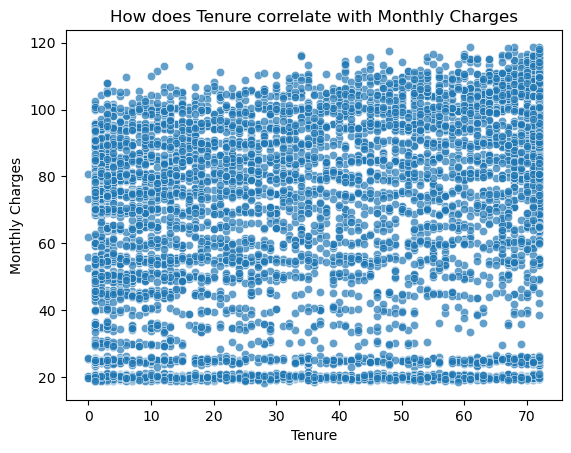

In [11]:
telco_churn = pd.read_sql('select * from customers;', env.get_db_url(env.username, env.hostname, env.password, 'telco_churn'))
sns.scatterplot(data=telco_churn, x='tenure', y='monthly_charges', alpha = 0.7)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('How does Tenure correlate with Monthly Charges')
r, p = stats.pearsonr(telco_churn.monthly_charges, telco_churn.tenure)
r, p

In [186]:
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


There is a linear relationship but it is weak.

* Total Charges

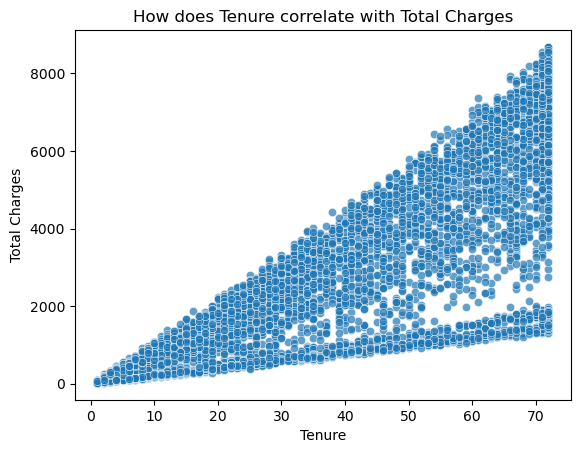

(0.8258804609332071, 0.0)

In [14]:
telco_churn['total_charges'] = pd.to_numeric(telco_churn['total_charges'], errors='coerce')
telco_churn = telco_churn.dropna(subset=['total_charges', 'tenure'])
sns.scatterplot(data=telco_churn, x='tenure', y='total_charges', alpha = 0.7)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('How does Tenure correlate with Total Charges')
plt.show()
r, p = stats.pearsonr(telco_churn.total_charges, telco_churn.tenure)
r, p

In [ ]:
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

There is a linear relationship, it is strong.

* What happens if you control for phone and internet service?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


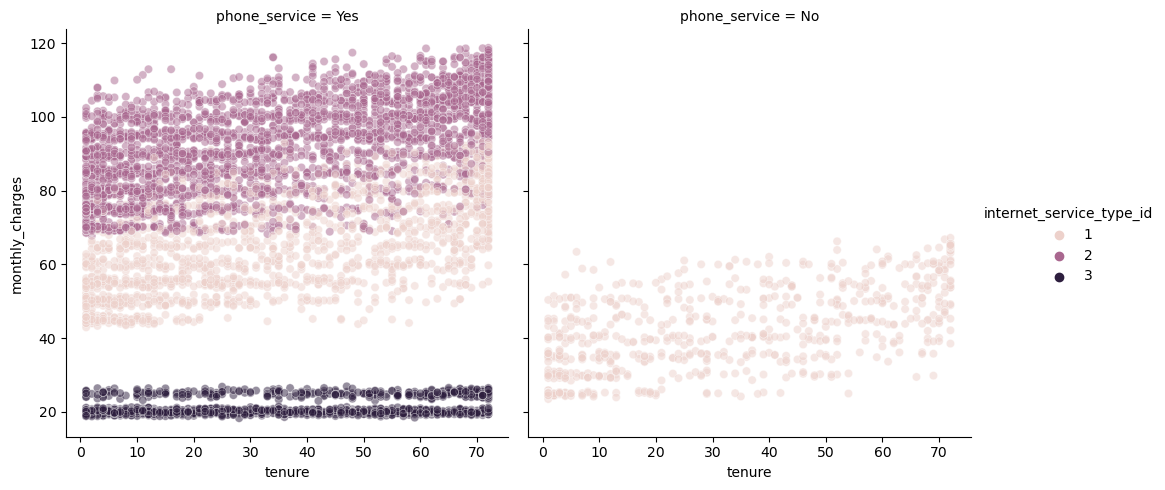

In [15]:
telco_churn = telco_churn [telco_churn.total_charges != ' ']
telco_churn.total_charges.astype(float)
sns.relplot(data=telco_churn, x='tenure', y='monthly_charges', hue='internet_service_type_id',col= 'phone_service', alpha = 0.5)
plt.show()

In [ ]:
def run_pearsonr(df):
    r,p = stats.pearsonr(telco_churn.monthly_charges,telco_churn.tenure)
    return pd.Series((r,p))

In [ ]:
telco_churn.groupby(['phone_service','internet_service_type_id']).apply(run_pearsonr)

We reject the null hypothesis for all

**Use the employees database.**

In [134]:
employees2 = pd.read_sql('select * from employees limit 5', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
employees2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


* Is there a relationship between how long an employee has been with the company and their salary?


In [4]:
employees2 = pd.read_sql('''select * from employees
join salaries
using (emp_no)
where to_date > now()
;''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
employees2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [21]:
employees2['tenure_days'] = employees2.to_date - employees2.hire_date

In [31]:
employees2.tenure_days.astype('str').str.split(expand=True)[0]

AttributeError: 'DataFrame' object has no attribute 'tenure_day'

In [26]:
employees2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,"2926512 days, 0:00:00"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,"2926729 days, 0:00:00"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,"2926449 days, 0:00:00"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,"2926354 days, 0:00:00"
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,"2925338 days, 0:00:00"


TypeError: float() argument must be a string or a real number, not 'datetime.timedelta'

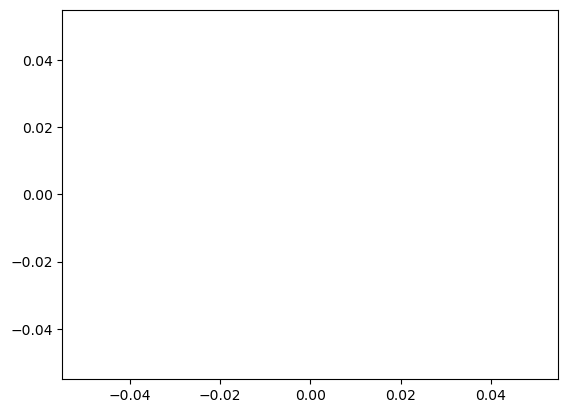

In [33]:
employees2.tenure_day.astype(int)
alpha = 0.05
sns.scatterplot(data=employees2, x='tenure_days',y='salary')

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

**Use the sleepstudy data.**

In [35]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


* Is there a relationship between days and reaction time?

- $H_o$: There is no relationship between days and reaction time
- $H_a$: There is a relationship between days and reaction time

(0.5352302262650255, 9.894096322214486e-15)

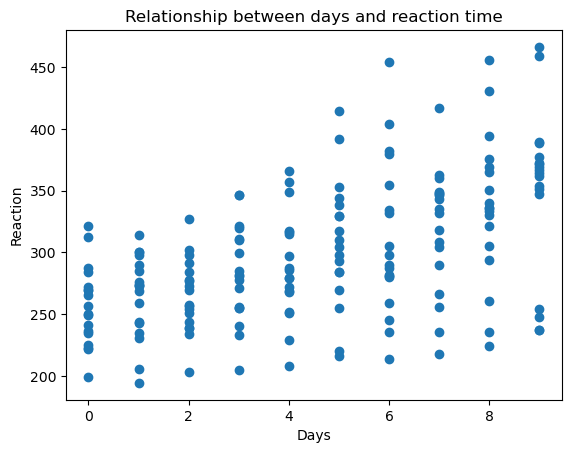

In [36]:
plt.scatter( sleepstudy.Days, sleepstudy.Reaction)
plt.xlabel('Days')
plt.ylabel('Reaction')
plt.title('Relationship between days and reaction time')
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

In [37]:
alpha = 0.05
if p == 0:
    print('There is no correlation')
elif p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


**1. Answer with the type of test you would use (assume normal distribution):**

* Is there a difference in grades of students on the second floor compared to grades of all students?\
1 Sample 2 Tail T-Test
* Are adults who drink milk taller than adults who don't drink milk?\
2 Sample 1 Tail T-Test
* Is the price of gas higher in Texas or in New Mexico?\
2 Sample 1 Tail T-Test
* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?\
ANOVA test

**2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.**

2 Sample, 2 Tail

- $H_o$: There is no difference in time to sell homes between the two offices
- $H_a$: There is difference in time to sell homes between the two offices

In [45]:
mean1 = 90
sd1 = 15
nobs1 = 40
mean2 = 100
sd2 = 20
nobs2 = 50
alpha = 0.05
t_stats, p = stats.ttest_ind_from_stats(mean1,sd1,nobs1,mean2,sd2,nobs2)
t_stats, p

(-2.6252287036468456, 0.01020985244923939)

In [46]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


**3. Load the mpg dataset and use it to answer the following questions:**

In [39]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


2 Sample, 2 Tail

- $H_o$: There is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [94]:
mpg['avg_mpg'] = ((mpg.cty + mpg.hwy) / 2)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,avg_2008,avg_1999
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,NaN,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,NaN,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5,NaN
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5,NaN
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,NaN,21.0


In [93]:
avg_2008 = mpg[mpg.year == 2008].avg_mpg
avg_1999 = mpg[mpg.year == 1999].avg_mpg
avg_2008.head(), avg_1999.head()

(3     25.5
 4     25.5
 7     22.5
 10    24.0
 11    23.0
 Name: avg_mpg, dtype: float64,
 1    23.5
 2    25.0
 5    21.0
 6    22.0
 8    22.0
 Name: avg_mpg, dtype: float64)

In [88]:
t_stat, p_val = stats.ttest_ind(avg_1999, avg_2008)
t_stat, p_val

(0.21960177245940962, 0.8263744040323578)

In [90]:
if p_val < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


* Are compact cars more fuel-efficient than the average car?


1 Sample, 1 Tail

In [95]:
compact_avg = mpg[mpg['class'] == 'compact'].avg_mpg
compact_avg.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [98]:
μ = mpg.avg_mpg.mean()
t_stat, p_val = stats.ttest_1samp(compact_avg, μ)
t_stat, p_val

(7.896888573132533, 4.1985637943171486e-10)

In [99]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


* Do manual cars get better gas mileage than automatic cars?

2 Sample, 1 Tail

In [100]:
click_dist = stats.binom(618, 0.1)
#odds of getting 97 or more click throughs
click_dist.sf(70)

0.1228196933987875